In [2]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Load your topic-labeled data
df = pd.read_csv("labeled_topics.csv")
analyzer = SentimentIntensityAnalyzer()


In [3]:
def analyze_bias(text):
    blob = TextBlob(text)
    vader_scores = analyzer.polarity_scores(text)
    
    return pd.Series({
        'subjectivity': blob.subjectivity,            # 0 (objective) to 1 (subjective)
        'polarity': blob.polarity,                    # -1 (neg) to 1 (pos)
        'vader_compound': vader_scores['compound'],   # -1 to 1 sentiment score
        'vader_pos': vader_scores['pos'],
        'vader_neg': vader_scores['neg'],
        'vader_neu': vader_scores['neu'],
    })


In [4]:
# Analyze articles for speed 
df_features = df['clean_text'].apply(analyze_bias)
df_combined = pd.concat([df, df_features], axis=1)
df_combined.to_csv("bias_features_output.csv", index=False)


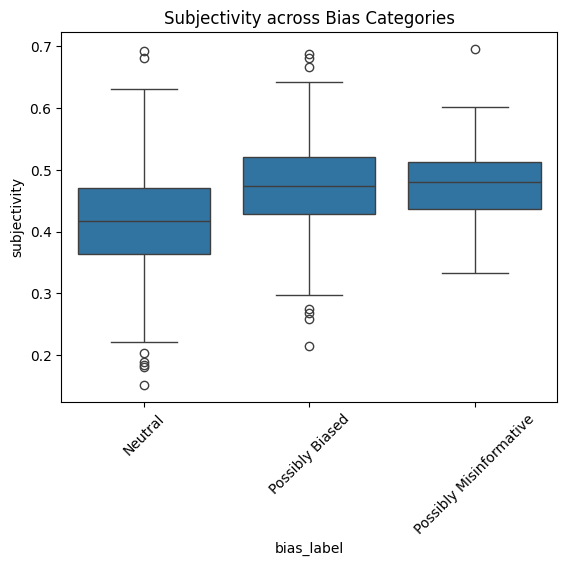

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of subjectivity by bias label
sns.boxplot(data=df_combined, x="bias_label", y="subjectivity")
plt.title("Subjectivity across Bias Categories")
plt.xticks(rotation=45)
plt.show()
